In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import matplotlib.dates as mdates

In [2]:
ds = xr.open_zarr('data_figS6.zarr/')

In [3]:
width = 95*0.0393700787

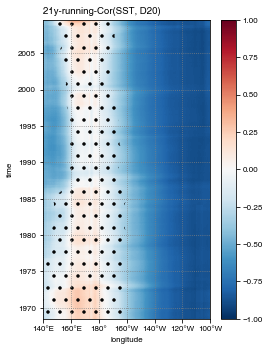

In [4]:
fig = plt.figure(figsize=(width, 5.5))
plt.rcParams['font.size'] =8

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

ax1 = fig.add_subplot(111)
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ds.corr.plot(
    vmin=-1, vmax=1, cmap=plt.cm.RdBu_r,
    cbar_kwargs={'label': ''},
    rasterized=True
) 
ds.non_sig.plot.contourf(hatches=['.'], colors="None", add_colorbar=False) 
plt.title("21y-running-Cor(SST, D20)",loc='left')
plt.title('')
plt.xlim(140, 260)
plt.ylabel("time");
plt.xlabel('longitude');
plt.grid(color='grey',linestyle = ':')
plt.savefig("figS6.pdf", format="pdf", bbox_inches="tight")